# Keywords
- Use extracted keywords from S-1 raw filings
- Word2Vect visualization method by Jeff Delaney: Visualizing Word Vectors with t-SNE
 - https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne

In [1]:
#core
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

import pandas as pd
import numpy as np
from sklearn import neighbors

import glob
import nasdaq
import ml
from pathlib import Path
from sklearn.manifold import TSNE

#NLP
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from gensim.summarization import keywords
from gensim.models import Word2Vec

C:\Users\Void\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


# Integrating IPO Keywords

In [2]:
#load previous dataset
df = pd.read_csv('../Datasets/3 summarization.csv', index_col='Symbol')

In [3]:
#tokenize words
counter = 0    
documents = []

for x in df.index:
    try:
        counter += 1
        print('\n( ' + str(counter) + ' / ' + str(df.shape[0]) + ' ) ' + x)

        #check if keywords are available
        file_name = "../Keywords/" + x + ".txt"
        if Path(file_name).is_file():
            #load data
            with open(file_name, "r", encoding="utf-8") as file:
                text = file.read()
                documents.append(word_tokenize(text))
        else:
            print('no S-1 keywords for ', x)
    except Exception as e:
        print(x, e)


( 1 / 696 ) AACC

( 2 / 696 ) AAT

( 3 / 696 ) ABR

( 4 / 696 ) ABTX

( 5 / 696 ) ACAD

( 6 / 696 ) ACFC

( 7 / 696 ) ACIA

( 8 / 696 ) ACMR

( 9 / 696 ) ACOR

( 10 / 696 ) ACRX

( 11 / 696 ) ACUS

( 12 / 696 ) ADMS

( 13 / 696 ) ADOM

( 14 / 696 ) ADRO

( 15 / 696 ) ADSW

( 16 / 696 ) ADT

( 17 / 696 ) ADUS

( 18 / 696 ) AEL

( 19 / 696 ) AERI

( 20 / 696 ) AFFY

( 21 / 696 ) AFH

( 22 / 696 ) AIMC

( 23 / 696 ) AIMT

( 24 / 696 ) AIZ

( 25 / 696 ) AJX

( 26 / 696 ) AKAO

( 27 / 696 ) AKBA

( 28 / 696 ) AKER

( 29 / 696 ) AL

( 30 / 696 ) ALDR

( 31 / 696 ) ALDX

( 32 / 696 ) ALGT

( 33 / 696 ) ALRM

( 34 / 696 ) ALRN

( 35 / 696 ) ALSN

( 36 / 696 ) AM

( 37 / 696 ) AMBA

( 38 / 696 ) AMGP

( 39 / 696 ) ANAB

( 40 / 696 ) ANET

( 41 / 696 ) ANGI

( 42 / 696 ) ANTH

( 43 / 696 ) APAM

( 44 / 696 ) APEI

( 45 / 696 ) APKT

( 46 / 696 ) APO

( 47 / 696 ) APPF

( 48 / 696 ) APPN

( 49 / 696 ) APRN

( 50 / 696 ) ARMK

( 51 / 696 ) ARMO

( 52 / 696 ) ARYX

( 53 / 696 ) ASV

( 54 / 696 ) A


( 434 / 696 ) OC

( 435 / 696 ) OCUL

( 436 / 696 ) OFSI

( 437 / 696 ) OIS

( 438 / 696 ) OKTA

( 439 / 696 ) OLLI

( 440 / 696 ) OMED

( 441 / 696 ) OMER

( 442 / 696 ) OMPI

( 443 / 696 ) ONCE

( 444 / 696 ) ONDK

( 445 / 696 ) ONTX

( 446 / 696 ) OPESU

( 447 / 696 ) OPGN

( 448 / 696 ) OPHT

( 449 / 696 ) OPTN

( 450 / 696 ) OPTR

( 451 / 696 ) OPTT

( 452 / 696 ) ORC

( 453 / 696 ) ORIT

( 454 / 696 ) OSTK

( 455 / 696 ) OTIC

( 456 / 696 ) OTT

( 457 / 696 ) OUNZ

( 458 / 696 ) OVID

( 459 / 696 ) OXFD

( 460 / 696 ) OZM

( 461 / 696 ) P

( 462 / 696 ) PACB

( 463 / 696 ) PAGP

( 464 / 696 ) PAHC

( 465 / 696 ) PANW

( 466 / 696 ) PAY

( 467 / 696 ) PAYC

( 468 / 696 ) PBF

( 469 / 696 ) PBFX

( 470 / 696 ) PBIB

( 471 / 696 ) PBIP

( 472 / 696 ) PBPB

( 473 / 696 ) PCRX

( 474 / 696 ) PCTY

( 475 / 696 ) PDM

( 476 / 696 ) PE

( 477 / 696 ) PEB

( 478 / 696 ) PEGI

( 479 / 696 ) PER

( 480 / 696 ) PETX

( 481 / 696 ) PF

( 482 / 696 ) PFMT

( 483 / 696 ) PFNX

( 484 / 696 ) PF

# Word2Vect

In [4]:
# build vocabulary and train model
model1 = Word2Vec(documents, size=len(documents))
model2 = Word2Vec(documents, size=len(documents), hs=1, negative=0)

In [5]:
# Code by Jeff Delaney: Visualizing Word Vectors with t-SNE
# https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
    
matplotlib.rcParams.update({'font.size': 10})

C:\Users\Void\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


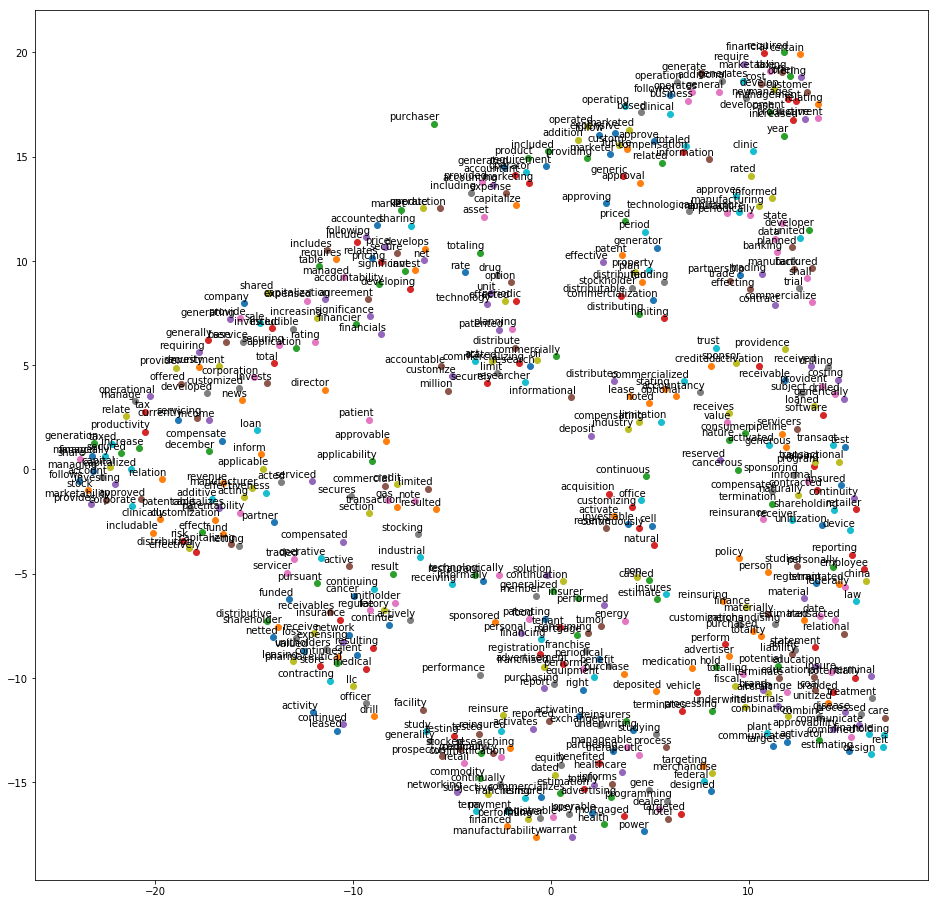

In [6]:
tsne_plot(model1)

In [12]:
' '.join(list(model1.wv.vocab.keys()))

'receivable certain cash financial received information operates operation receives operating follow purchased included accountant accounting expense asset including operate sharing accounted purchase accountability include following includes expensed purchasing shared receiving company inform december tax operational receivables share account receive taxed follows stock purchaser management offering taxing marketable accountancy addition property requirement lease totaling tenant capitalization base corporation officer leasing financially managing includable related marketing net accountable managed service capital corporate leased relating offer manages costing cost general additional marketed office generated capitalize market generally income servicing servicer manage relate capitalized manager relation required retailer require generate business based operated operator relates requires table total requiring offered retail generality loaned generates rate invest mortgage invested g

# Integrate Word Embeddings

In [6]:
#add sentiment features
df_keywords_features = pd.DataFrame()
counter = 0    

for x in df.index:
    try:
        counter += 1
        print('\n( ' + str(counter) + ' / ' + str(df.shape[0]) + ' ) ' + x)

        #check if keywords are available
        file_name = "../Keywords/" + x + ".txt"
        if Path(file_name).is_file():
            #load data
            with open(file_name, "r", encoding="utf-8") as file:
                text = file.read()
                words = word_tokenize(text)
                    
                #keywords features
                df_keywords_features.at[x, 'Keywords Count'] = len(words)
                dist = []
                vect = []
                
                for w in words:
                    scores = []
                    
                    if w in model1.wv.vocab:
                        for _, j in model1.wv.most_similar(w):
                            dist.append(j)
                    
                    if w in model1.wv.vocab:
                        for k in model1.wv[w]:
                            vect.append(j)
                    
                    if w in model2.wv.vocab:
                        scores.append(model2.score(w))
                    
                df_keywords_features.at[x, 'Keywords Similarity Top'] = dist[0]
                df_keywords_features.at[x, 'Keywords Similarity Sum'] = np.sum(dist)
                df_keywords_features.at[x, 'Keywords Similarity Vect Min'] = np.min(vect)
                df_keywords_features.at[x, 'Keywords Similarity Vect Max'] = np.max(vect)
                df_keywords_features.at[x, 'Keywords Similarity Vect Sum'] = np.sum(vect)
                df_keywords_features.at[x, 'Keywords Similarity Vect Mean'] = np.mean(vect)
                #df_keywords_features.at[x, 'Keywords Similarity Word Score Sum'] = np.sum(scores)
                #df_keywords_features.at[x, 'Keywords Similarity Word Score Mean'] = np.mean(scores)
                    
                #df_keywords_features.at[x, 'Keywords Similarity Words Score'] = model2.score(words)[0]
        else:
            print('no S-1 keywords for ', x)
    except Exception as e:
        print(x, e)


( 1 / 696 ) AACC

( 2 / 696 ) AAT

( 3 / 696 ) ABR

( 4 / 696 ) ABTX

( 5 / 696 ) ACAD

( 6 / 696 ) ACFC

( 7 / 696 ) ACIA

( 8 / 696 ) ACMR

( 9 / 696 ) ACOR

( 10 / 696 ) ACRX

( 11 / 696 ) ACUS

( 12 / 696 ) ADMS

( 13 / 696 ) ADOM

( 14 / 696 ) ADRO

( 15 / 696 ) ADSW

( 16 / 696 ) ADT

( 17 / 696 ) ADUS

( 18 / 696 ) AEL

( 19 / 696 ) AERI

( 20 / 696 ) AFFY

( 21 / 696 ) AFH

( 22 / 696 ) AIMC

( 23 / 696 ) AIMT

( 24 / 696 ) AIZ

( 25 / 696 ) AJX

( 26 / 696 ) AKAO

( 27 / 696 ) AKBA

( 28 / 696 ) AKER

( 29 / 696 ) AL

( 30 / 696 ) ALDR

( 31 / 696 ) ALDX

( 32 / 696 ) ALGT

( 33 / 696 ) ALRM

( 34 / 696 ) ALRN

( 35 / 696 ) ALSN

( 36 / 696 ) AM

( 37 / 696 ) AMBA

( 38 / 696 ) AMGP

( 39 / 696 ) ANAB

( 40 / 696 ) ANET

( 41 / 696 ) ANGI

( 42 / 696 ) ANTH

( 43 / 696 ) APAM

( 44 / 696 ) APEI

( 45 / 696 ) APKT

( 46 / 696 ) APO

( 47 / 696 ) APPF

( 48 / 696 ) APPN

( 49 / 696 ) APRN

( 50 / 696 ) ARMK

( 51 / 696 ) ARMO

( 52 / 696 ) ARYX

( 53 / 696 ) ASV

( 54 / 696 ) A


( 416 / 696 ) NFLX

( 417 / 696 ) NFP

( 418 / 696 ) NGS

( 419 / 696 ) NGVC

( 420 / 696 ) NINE

( 421 / 696 ) NMRK

( 422 / 696 ) NOVN

( 423 / 696 ) NOW

( 424 / 696 ) NSM

( 425 / 696 ) NSTG

( 426 / 696 ) NTGR

( 427 / 696 ) NWHM

( 428 / 696 ) NWY

( 429 / 696 ) NXTM

( 430 / 696 ) NYLD

( 431 / 696 ) OAK

( 432 / 696 ) OAS

( 433 / 696 ) OBLN

( 434 / 696 ) OC

( 435 / 696 ) OCUL

( 436 / 696 ) OFSI

( 437 / 696 ) OIS

( 438 / 696 ) OKTA

( 439 / 696 ) OLLI

( 440 / 696 ) OMED

( 441 / 696 ) OMER

( 442 / 696 ) OMPI

( 443 / 696 ) ONCE

( 444 / 696 ) ONDK

( 445 / 696 ) ONTX

( 446 / 696 ) OPESU

( 447 / 696 ) OPGN

( 448 / 696 ) OPHT

( 449 / 696 ) OPTN

( 450 / 696 ) OPTR

( 451 / 696 ) OPTT

( 452 / 696 ) ORC

( 453 / 696 ) ORIT

( 454 / 696 ) OSTK

( 455 / 696 ) OTIC

( 456 / 696 ) OTT

( 457 / 696 ) OUNZ

( 458 / 696 ) OVID

( 459 / 696 ) OXFD

( 460 / 696 ) OZM

( 461 / 696 ) P

( 462 / 696 ) PACB

( 463 / 696 ) PAGP

( 464 / 696 ) PAHC

( 465 / 696 ) PANW

( 466 / 696 ) 

In [7]:
df.head()

,Summary Signal compound,Summary Signal neg,Summary Signal neu,Summary Signal pos,Summary Mean Sent Len,Summary Sent Count,Neg Sent Signal compound,Neg Sent Signal neg,Neg Sent Signal neu,Neg Sent Signal pos,...,MKT12,Name Words,Name Length,Offer Amount,Price,Shares,1D,1W,1M,3M
Symbol,,,,,,,,,,,,,,,,,,,,,
AACC,-0.906097,5.414160,-2.693572,-1.104553,-0.597584,0.654193,0.750307,0.188291,-0.188526,-0.088264,...,0,0.950208,0.958673,-0.207315,-0.098813,-0.256559,0.002401,0.026411,0.073229,0.121248
AAT,0.731373,0.851544,-0.933858,0.433139,-0.091404,-0.477033,0.393542,-0.595995,0.415479,0.748544,...,0,0.950208,0.701675,0.305495,0.565817,0.370542,-0.017185,-0.010683,-0.019508,-0.008825
ABR,-0.093705,-1.241266,0.210279,0.739901,-0.433039,0.654193,2.255889,-0.648139,0.047402,1.835012,...,0,0.950208,0.059182,-0.184455,0.505396,-0.278814,0.022444,-0.030923,-0.022444,-0.003990
ABTX,1.347298,0.716212,-1.021951,0.655768,0.860479,-0.759840,0.371174,-0.206152,-0.139155,0.980488,...,0,-0.116672,0.701675,-0.263654,0.626238,-0.391157,0.027938,-0.008869,0.054989,0.004878
ACAD,1.327692,0.084663,-0.110939,0.065543,0.780699,-0.759840,-0.056967,0.067109,-0.039826,-0.099553,...,0,-0.116672,0.573177,-0.285564,-1.065549,-0.317740,-0.075269,-0.112903,-0.134409,-0.233871


In [8]:
df_keywords_features.head()

,Keywords Count,Keywords Similarity Top,Keywords Similarity Sum,Keywords Similarity Vect Min,Keywords Similarity Vect Max,Keywords Similarity Vect Sum,Keywords Similarity Vect Mean
AACC,53.0,0.998851,426.532850,0.971440,0.994432,29494.103289,0.985502
AAT,97.0,0.999376,920.880027,0.917963,0.996005,63635.654530,0.983124
ABR,69.0,0.999376,672.928484,0.917963,0.994432,46477.341515,0.982026
ABTX,76.0,0.999376,743.458183,0.969296,0.995784,51397.936433,0.984635
ACAD,61.0,0.986349,603.553021,0.950735,0.994432,41682.290196,0.981776


In [9]:
df1 = pd.concat([ml.standardize(df_keywords_features), df], axis=1).dropna()

# Clustering

#save targets
targets = df[df.columns[-4:]]
df = df[df.columns[:-4]]

def add_nearest_neigbors(df):
    sample = df.copy()
    nbrs = neighbors.NearestNeighbors(n_neighbors=3).fit(sample)
    distances, indices = nbrs.kneighbors(df, n_neighbors=1)
    similar = df.iloc[indices[:, 0]]
    cols = ['KNN ' + x for x in list(df.columns)] + list(df.columns)
    
    return pd.DataFrame(np.concatenate([similar.values, df.values], axis=1), columns=cols, index=df.index)

#add cluster features (1-NN)
df = add_nearest_neigbors(df)
df1 = pd.concat([df, targets], axis=1)

In [11]:
#save for later improvements
df1.to_csv('../Datasets/4 keywords.csv', index=True, index_label='Symbol')

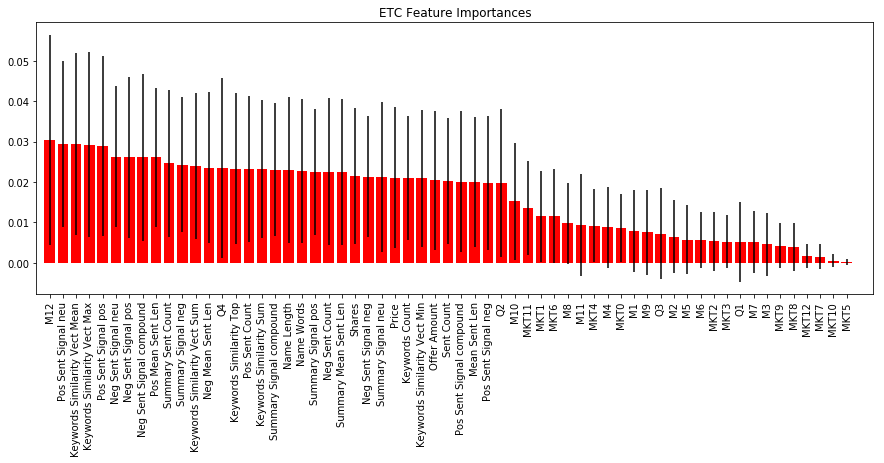

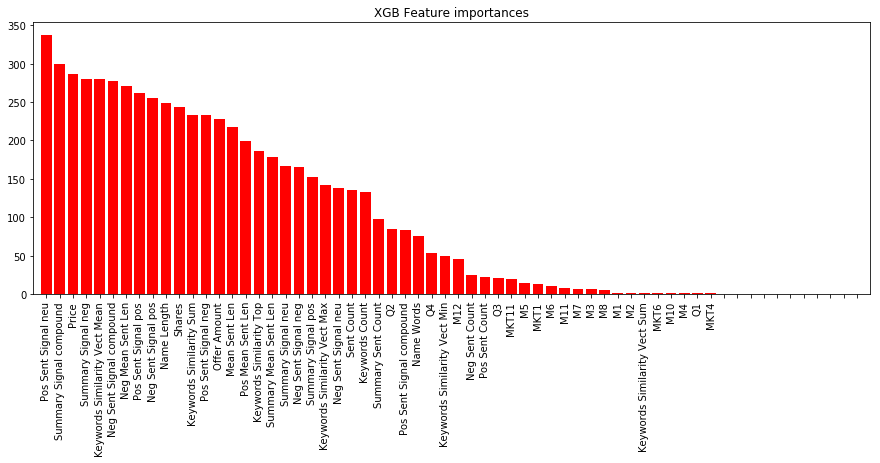

In [12]:
#feature importance
indices = ml.show_feature_importance(df1, '3M')

In [13]:
#feature selection
df1 = ml.select_features(indices.shape[0], indices, df1)

['Keywords Similarity Vect Max', 'Keywords Similarity Vect Mean', 'Summary Signal compound', 'Summary Signal neg', 'Pos Sent Signal neu', 'Pos Sent Signal pos', 'M12', 'Price']


C:\Users\Void\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


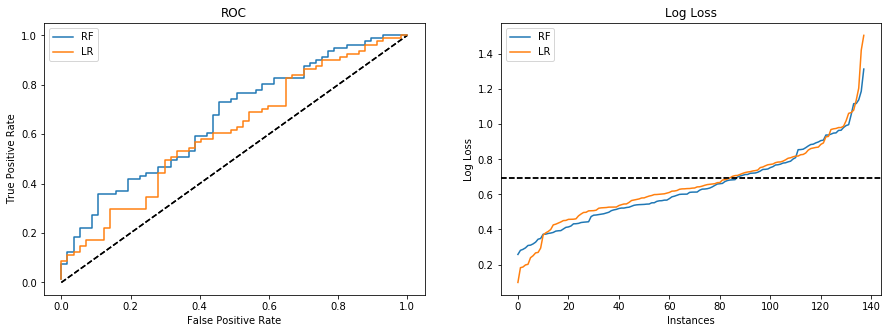

1D        1W        1M        3M
AUC      LR  0.544509  0.544509  0.544509  0.544509
         RF  0.578622  0.578622  0.578622  0.578622
f1       LR  0.732673  0.732673  0.732673  0.732673
         RF  0.735751  0.735751  0.735751  0.735751
log loss LR  0.655687  0.655687  0.655687  0.655687
         RF  0.640521  0.640521  0.640521  0.640521

In [14]:
#now run ML flow with cluster features
ml.run_ml_flow(df1)